In [1]:
# All The necessary imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Loading and preprocessing dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 784)  # Normalize and flatten
x_test = (x_test.astype("float32") / 255.0).reshape(-1, 784)

# The RBM Class
class RBM(keras.Model):
    def __init__(self, visible_dim=784, hidden_dim=128, learning_rate=0.01):
        super(RBM, self).__init__()
        self.visible_dim = visible_dim
        self.hidden_dim = hidden_dim
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W = tf.Variable(tf.random.normal([visible_dim, hidden_dim], stddev=0.01), trainable=True)
        self.bv = tf.Variable(tf.zeros([visible_dim]), trainable=True)
        self.bh = tf.Variable(tf.zeros([hidden_dim]), trainable=True)

    def sample_hidden(self, v):
        """Sample hidden units given visible units"""
        h_prob = tf.nn.sigmoid(tf.matmul(v, self.W) + self.bh)  # P(h|v)
        return tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob))))  # Sample h

    def sample_visible(self, h):
        """Sample visible units given hidden units"""
        v_prob = tf.nn.sigmoid(tf.matmul(h, tf.transpose(self.W)) + self.bv)  # P(v|h)
        return tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))  # Sample v

    def train_step(self, v0):

        # Positive phase
        h0 = self.sample_hidden(v0)

        v1 = self.sample_visible(h0)
        h1 = self.sample_hidden(v1)

        # Update the weights
        dW = tf.matmul(tf.transpose(v0), h0) - tf.matmul(tf.transpose(v1), h1)
        self.W.assign_add(self.learning_rate * dW / tf.cast(tf.shape(v0)[0], tf.float32))
        self.bv.assign_add(self.learning_rate * tf.reduce_mean(v0 - v1, axis=0))
        self.bh.assign_add(self.learning_rate * tf.reduce_mean(h0 - h1, axis=0))

    def call(self, inputs):
        """Forward pass: Generate hidden activations"""
        return self.sample_hidden(inputs)

# Training RBM
rbm = RBM()

epochs = 120
batch_size = 64

for epoch in range(epochs):
    for i in range(0, x_train.shape[0], batch_size):
        batch = x_train[i : i + batch_size]
        rbm.train_step(batch)

    print(f"Epoch {epoch + 1}/{epochs} completed.")

print("Training finished!")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/120 completed.
Epoch 2/120 completed.
Epoch 3/120 completed.
Epoch 4/120 completed.
Epoch 5/120 completed.
Epoch 6/120 completed.
Epoch 7/120 completed.
Epoch 8/120 completed.
Epoch 9/120 completed.
Epoch 10/120 completed.
Epoch 11/120 completed.
Epoch 12/120 completed.
Epoch 13/120 completed.
Epoch 14/120 completed.
Epoch 15/120 completed.
Epoch 16/120 completed.
Epoch 17/120 completed.
Epoch 18/120 completed.
Epoch 19/120 completed.
Epoch 20/120 completed.
Epoch 21/120 completed.
Epoch 22/120 completed.
Epoch 23/120 completed.
Epoch 24/120 completed.
Epoch 25/120 completed.
Epoch 26/120 completed.
Epoch 27/120 completed.
Epoch 28/120 completed.
Epoch 29/120 completed.
Epoch 30/120 completed.
Epoch 31/120 completed.
Epoch 32/120 completed.
Epoch 33/120 completed.
Epoch 34/120 completed.
Epoch 35/120 completed.
Epoch 36/120 completed.
Epoch 37/120 completed.
Epoch 38/120 completed.
Epoch 39/120 completed.
Epoch 40/120 completed

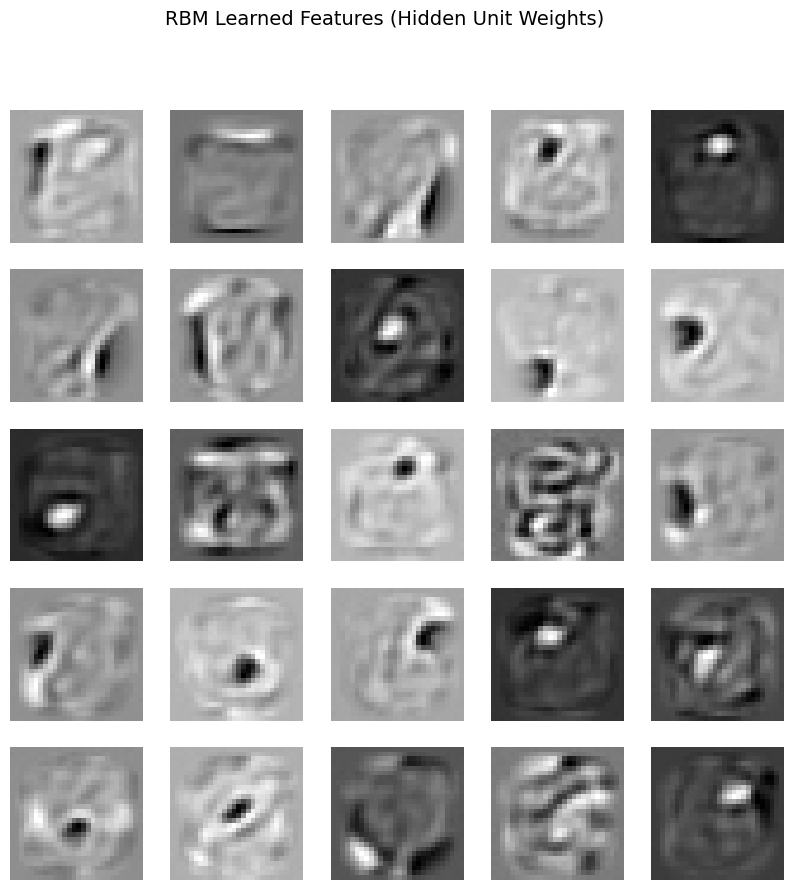

In [2]:
import matplotlib.pyplot as plt

def visualize_rbm_weights(rbm, num_images=25):
    """ Visualize the learned features (weights) of the RBM """
    W = rbm.W.numpy().T  # Get weight matrix and transpose it (hidden x visible)

    fig, axes = plt.subplots(int(np.sqrt(num_images)), int(np.sqrt(num_images)), figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        if i >= num_images:
            break
        # Reshape each hidden unit's weights to 28x28 (same as input images)
        weight_image = W[i].reshape(28, 28)
        ax.imshow(weight_image, cmap="gray")
        ax.axis("off")

    plt.suptitle("RBM Learned Features (Hidden Unit Weights)", fontsize=14)
    plt.show()

# Call the function to visualize weights
visualize_rbm_weights(rbm)


In conclusion, I train a RBM with MNIST and the Contrastive Divergence for 120 epochs. The RBM learns proper feature representations visualized as weight filters of meaningful handwritten digits. These learned features often capture important patterns, such as strokes, edges, and digit-like structures, which is representative of the model's power to extract useful hierarchical representations. This visualization of the weight matrix provides evidence that it has learned both localized and distributed features, which it could further be leveraged from in unsupervised pre-training of deep learning models. Finally, future works could be based on stacking of multiple RBM to build DBN for improvement in performance.